In [24]:
import pandas as pd
from prophet import Prophet
df = pd.read_csv('canada-live-births.csv')

col_key = 'Date'
col_value = 'Count'

df1 = df[[col_key,col_value]].copy()
df1.rename(columns = {col_key:'ds',col_value:'y'}, inplace = True) 
df1.sort_values(by=['ds'])
m = Prophet()
m.fit(df1)

10:17:22 - cmdstanpy - INFO - Chain [1] start processing
10:17:22 - cmdstanpy - INFO - Chain [1] done processing


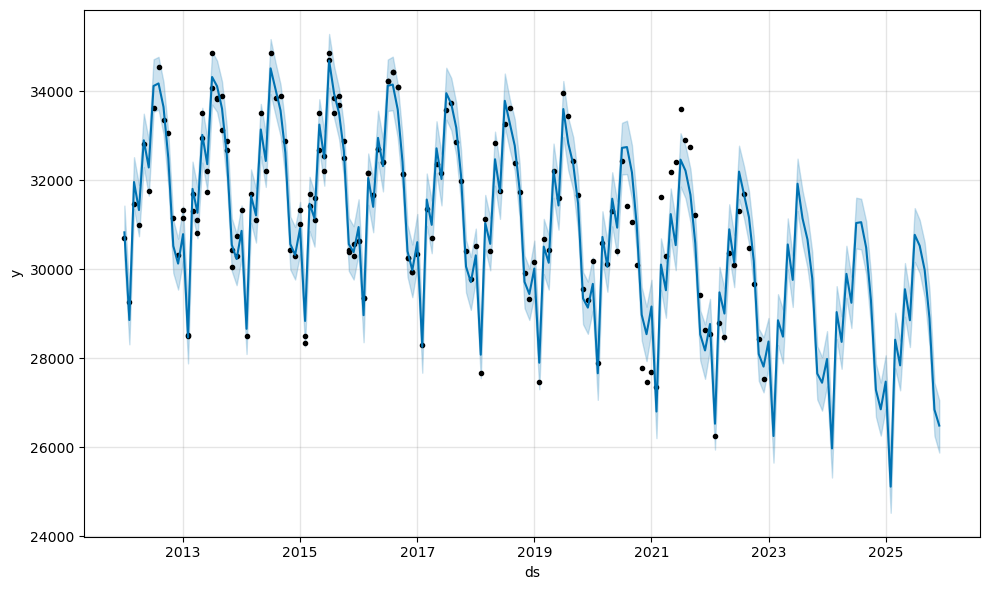

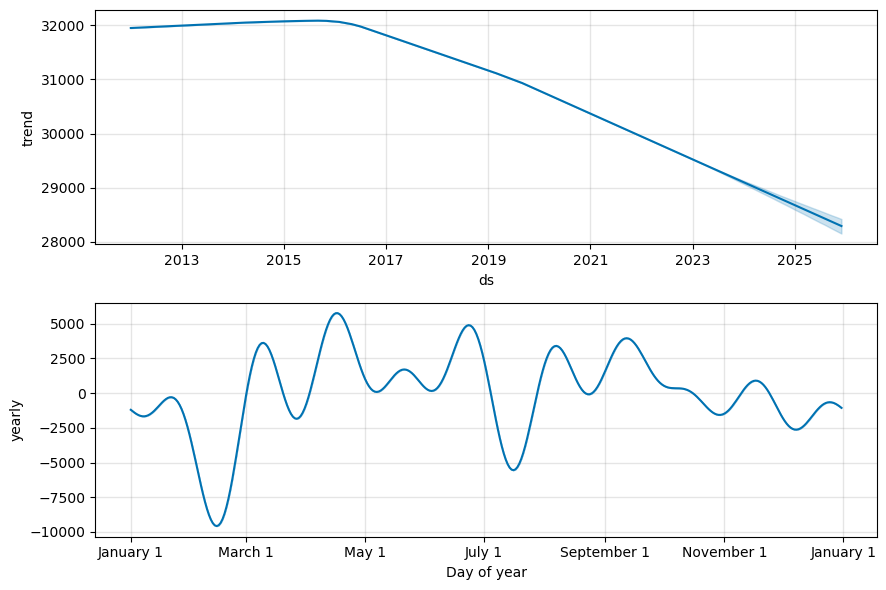

In [28]:
future = m.make_future_dataframe(periods = 36, freq = 'MS')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast, uncertainty=True)
fig2 = m.plot_components(forecast)

In [29]:
forecast.tail(36)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
132,2023-01-01,29525.283264,27799.401372,28909.079475,29525.283264,29525.329907,-1145.206661,-1145.206661,-1145.206661,-1145.206661,-1145.206661,-1145.206661,0.0,0.0,0.0,28380.076603
133,2023-02-01,29489.443745,25657.307272,26866.993065,29488.604280,29490.307380,-3234.561875,-3234.561875,-3234.561875,-3234.561875,-3234.561875,-3234.561875,0.0,0.0,0.0,26254.881870
134,2023-03-01,29457.072566,28299.380187,29444.253349,29454.873347,29459.089271,-600.051998,-600.051998,-600.051998,-600.051998,-600.051998,-600.051998,0.0,0.0,0.0,28857.020568
135,2023-04-01,29421.233047,27889.974340,29100.461804,29417.446222,29425.208235,-932.798553,-932.798553,-932.798553,-932.798553,-932.798553,-932.798553,0.0,0.0,0.0,28488.434494
136,2023-05-01,29386.549641,29990.677999,31147.926167,29380.959474,29392.537841,1175.561760,1175.561760,1175.561760,1175.561760,1175.561760,1175.561760,0.0,0.0,0.0,30562.111401
137,2023-06-01,29350.710122,29155.974188,30312.735770,29342.586608,29358.582548,414.389076,414.389076,414.389076,414.389076,414.389076,414.389076,0.0,0.0,0.0,29765.099198
138,2023-07-01,29316.026716,31314.367115,32490.987021,29305.321880,29326.013241,2611.217346,2611.217346,2611.217346,2611.217346,2611.217346,2611.217346,0.0,0.0,0.0,31927.244062
139,2023-08-01,29280.187197,30564.863264,31774.155339,29266.765476,29292.538671,1867.821480,1867.821480,1867.821480,1867.821480,1867.821480,1867.821480,0.0,0.0,0.0,31148.008676
140,2023-09-01,29244.347677,30035.167265,31235.038130,29227.384570,29259.441948,1427.673030,1427.673030,1427.673030,1427.673030,1427.673030,1427.673030,0.0,0.0,0.0,30672.020707
141,2023-10-01,29209.664271,29226.170467,30386.985283,29188.955246,29227.017833,579.814530,579.814530,579.814530,579.814530,579.814530,579.814530,0.0,0.0,0.0,29789.478801
